# Netflix Movies and TV Shows - Data Analysis

This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Kaggle.com. In this notebook we are going to process and analyze the data using Numpy and Pandas libraries,then we will visualize it using matplotlib and seaborn libraries.

## Data Preparation and Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
print('\nColumns with no value:') 
print(netflix_df.isnull().any())


Columns with no value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


In [6]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [8]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

## Data Analysis and Visualization

### 1.Percentage of Movies and TV Shows

It is a pie-chart showing the percentage of movies and tv shows.

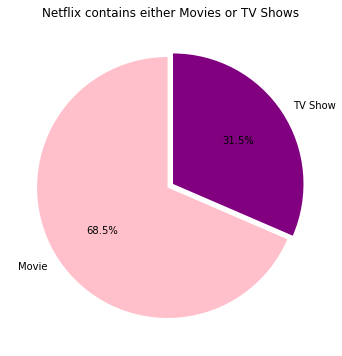

In [9]:
plt.figure(figsize=(12,6))
plt.title("Netflix contains either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['pink','purple'],autopct='%1.1f%%', startangle=90)
plt.show()

### 2.Comparison between Ratings of Movies and TV Shows

It shows a graph with rating on x-axis and the count on y-axis for both movies and tv shows

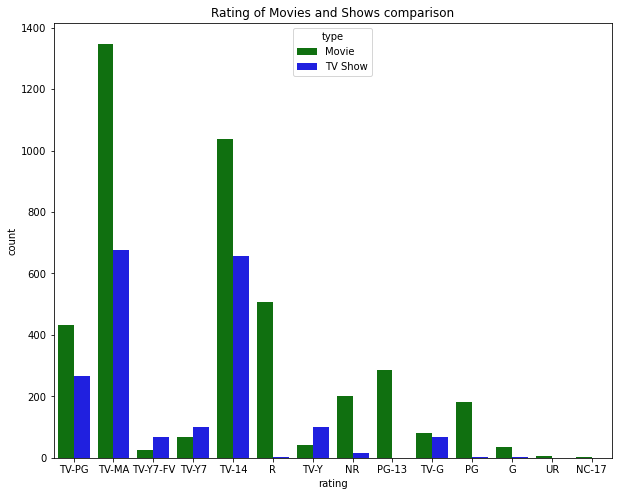

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df, palette=['green',"blue"])
plt.title('Rating of Movies and Shows comparison')
plt.show();

### 3.Top 15 Countries that have produced most content on Netflix

It shows a graph with 15 countries on the y-axis and count of content produced on the x-axis

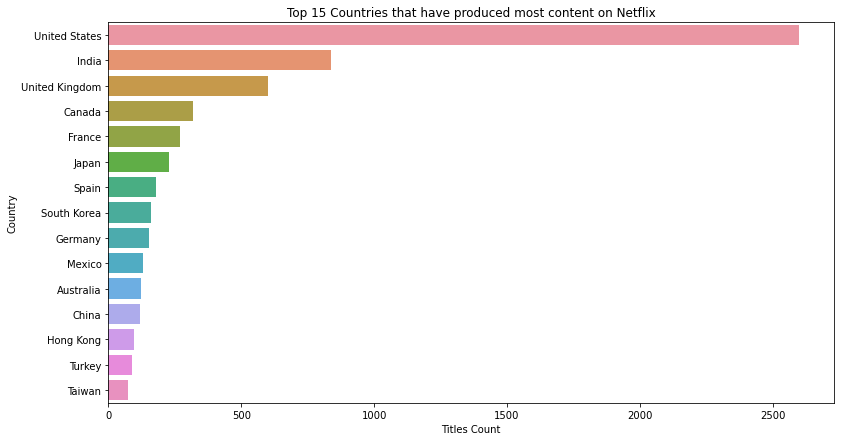

In [16]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries that have produced most content on Netflix')
plt.xlabel('Titles Count')
plt.ylabel('Country')
plt.show()

### 4.Top 20 Genres on Netflix

It shows a graph with 20 genres on the y-axis and count of content on the x-axis

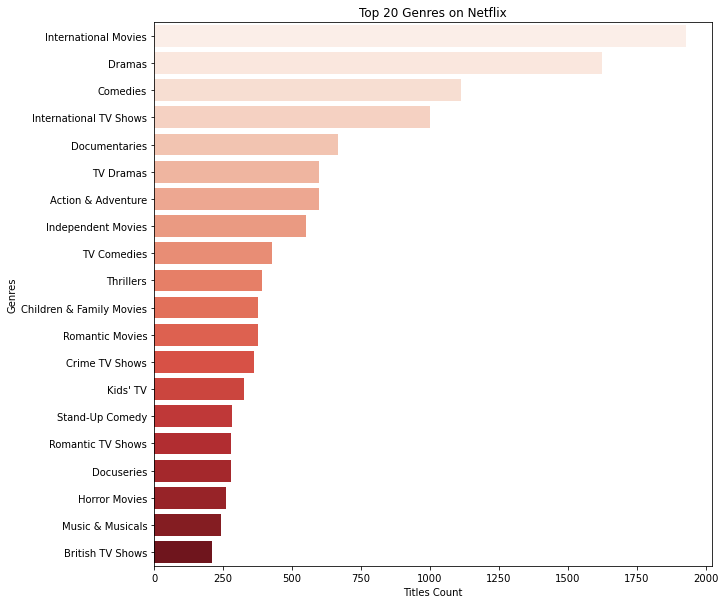

In [17]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20], palette='Reds')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles Count')
plt.ylabel('Genres')
plt.show()

### 5.Five Least Popular Genres on Netflix

It shows a graph with 5 least popular genres on the y-axis and count of content on the x-axis

In [13]:
genre=netflix_df["listed_in"].value_counts().tail(5)
genre

Anime Features, Music & Musicals, Sci-Fi & Fantasy         1
TV Horror, TV Mysteries, Teen TV Shows                     1
TV Sci-Fi & Fantasy, TV Thrillers                          1
Comedies, Cult Movies, Sports Movies                       1
TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy    1
Name: listed_in, dtype: int64

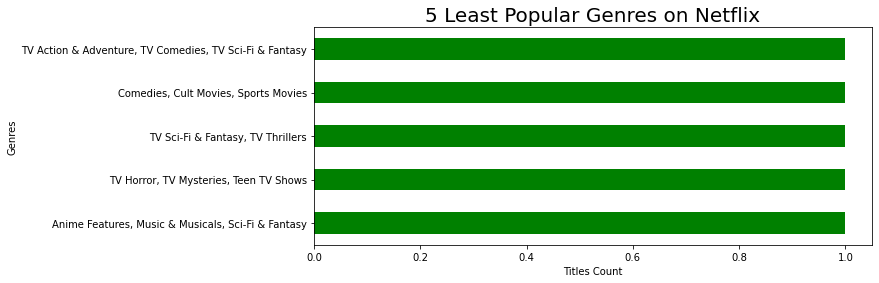

In [18]:
plt.figure(figsize=(10,4))
genre.plot(kind="barh",color="green")
plt.title("5 Least Popular Genres on Netflix",size=20);
plt.xlabel('Titles Count')
plt.ylabel('Genres')
plt.show()

### 6.Five Most Popular Genres on Netflix

It shows a graph with 5 most popular genres on the y-axis and count of content on the x-axis

In [19]:
genre=netflix_df["listed_in"].value_counts().head(5)

In [20]:
genre

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

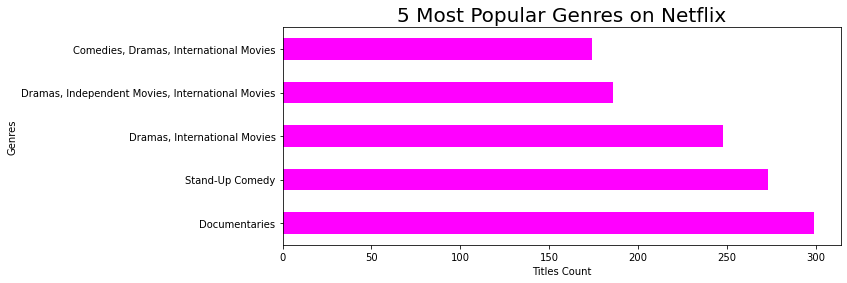

In [21]:
plt.figure(figsize=(10,4))
genre.plot(kind="barh",color="magenta")
plt.title("5 Most Popular Genres on Netflix",size=20);
plt.xlabel('Titles Count')
plt.ylabel('Genres')
plt.show()

### 7.Ratings

It shows a pie-chart of types of ratings and their percentages

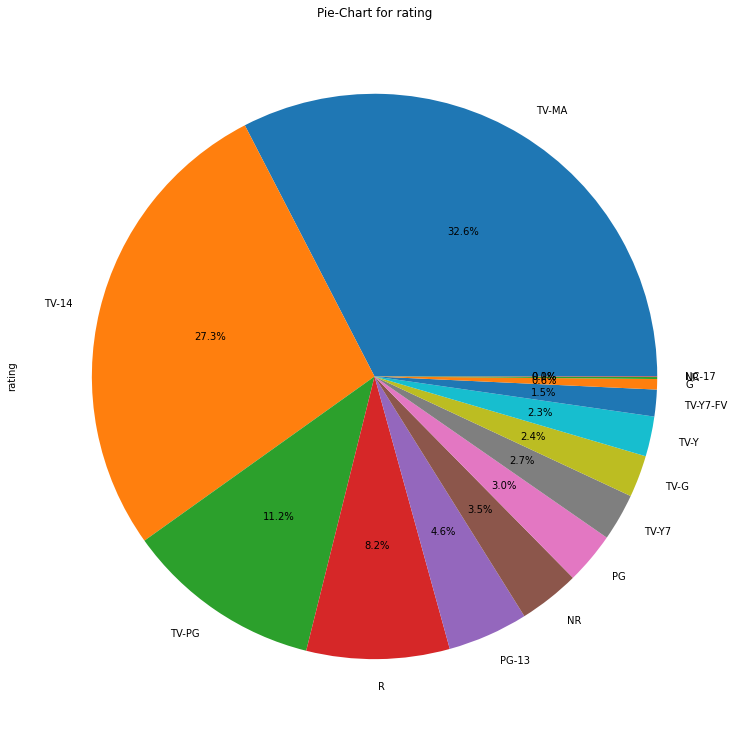

In [22]:
netflix_df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,13))
plt.title("Pie-Chart for rating");
plt.show()

### 8.Five oldest contents produced

It shows 5 oldest titles with their year of release

In [23]:
old = netflix_df.sort_values("release_year", ascending = True).head(5)
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943


### 9.Stand-Up Comedy based content produced by India

It shows content relevent to stand-up comedy produced by India

In [24]:
tag = "Stand-Up Comedy" 
netflix_df["relevant"] = netflix_df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix_df[netflix_df["relevant"] == 1]
com[com["country"] == "India"][["title", "country","release_year","type"]]

,title,country,release_year,type
2937,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017,Movie
5420,Gangs of Hassepur,India,2014,TV Show


### 10.Kids' TV based shows produced by India

It shows kids' tv shows produced by India

In [25]:
tag = "Kids' TV"
netflix_df["relevant"] = netflix_df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix_df[netflix_df["relevant"] == 1]
com[com["country"] == "India"][["title", "country","release_year","type"]].head(10)

,title,country,release_year,type
648,Mighty Little Bheem: Diwali,India,2019,TV Show
1998,Th Eena Meena Deeka Chase Comedy Show,India,2015,TV Show
3023,Chhota Bheem,India,2019,TV Show
5867,Sab Jholmaal Hai,India,2017,TV Show


### 11.Top 5 countries to produce content

It shows 5 countries that have produced most content

In [26]:
df_countries = pd.DataFrame(netflix_df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,2023
1,India,777
2,Country Unavailable,471
3,United Kingdom,347
4,Japan,174


### 12.Titles' word collage

It shows a collage of most frequently used words in the titles

In [28]:
from wordcloud import WordCloud

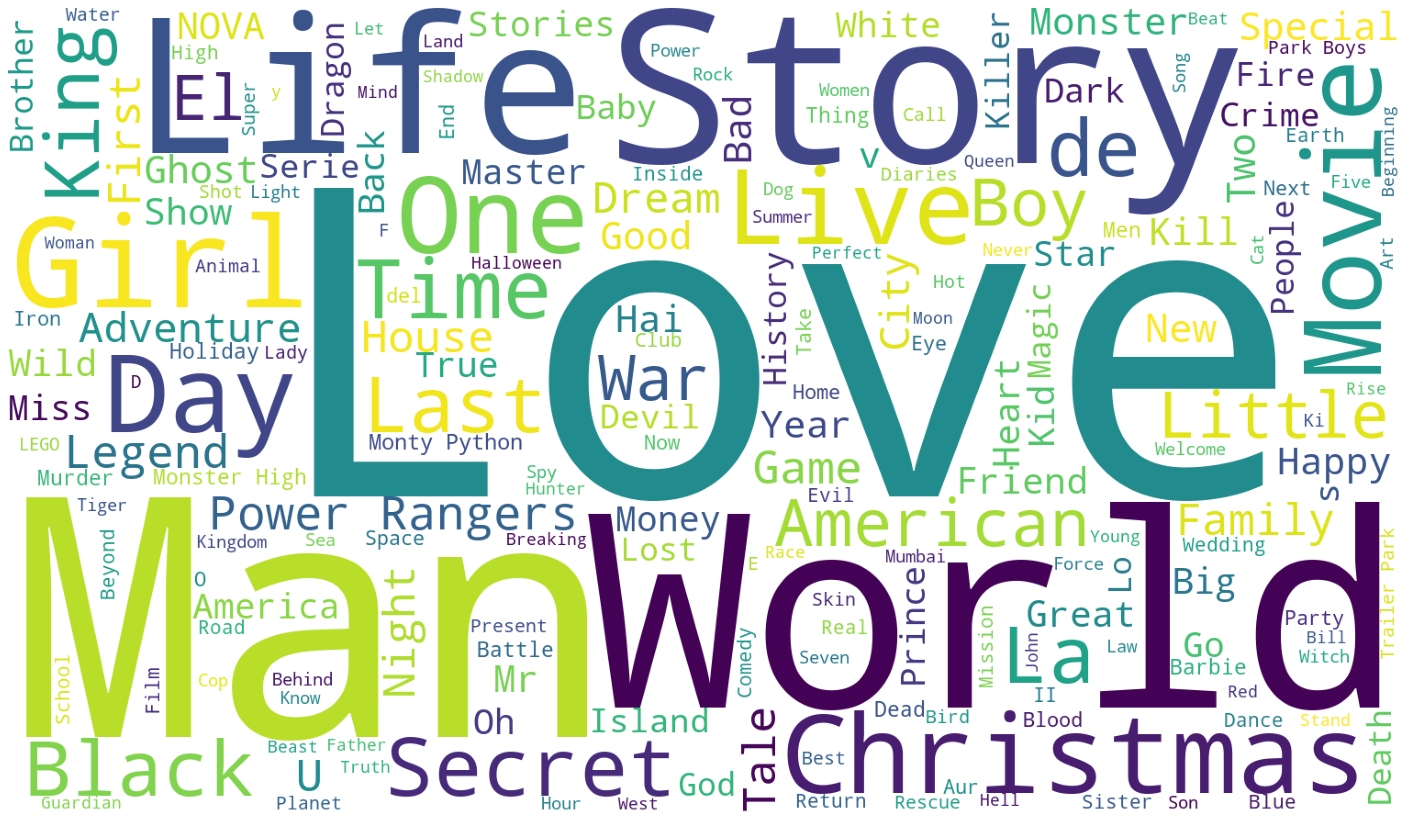

In [29]:
plt.subplots(figsize=(25,15))
wordcollage = WordCloud(
                          background_color='White',
                          width=1520,
                          height=880
                         ).generate(" ".join(netflix_df.title))
plt.imshow(wordcollage)
plt.axis('off')
plt.show()